### **INTRODUCTION TO DATA MINING**
#### **Assigment 1: Data exploration**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Computer Science Engineering Degree**
- **Mention: Computation**
- **Fourth year - First quadrimester**
- **Author:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

#### **Data**
We are using the dataset [`weather.arff`](https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/weather.arff):

In [1]:
from scipy.io import arff
import pandas as pd

# Load '.arff' file.
data = arff.loadarff("../datasets/vote.arff")
df = pd.DataFrame(data[0])

df


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'n',b'y',b'y',b'n',b'y',b'y',b'y',b'n',b'y',b'republican'
431,b'n',b'n',b'y',b'n',b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'democrat'
432,b'n',b'?',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'y',b'republican'
433,b'n',b'n',b'n',b'y',b'y',b'y',b'?',b'?',b'?',b'?',b'n',b'y',b'y',b'y',b'n',b'y',b'republican'


Before evaluating the Decision Tree and the K-Nearest Neighbor, categorical data should be encoded and then standardized:

In [2]:
from sklearn import preprocessing

# Categorical features to encode:
features = df.columns.tolist()

enc = preprocessing.OrdinalEncoder()

# Swap unencoded columns values for encoded columns values.
df[features] = enc.fit_transform(df[features])

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

df


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0
1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0
2,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
3,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0
4,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0
431,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
432,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
433,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0


#### **Evaluation of the Decision Tree**

Decision Tree:
	Train score = [0.97931034 0.95862069 0.93793103]


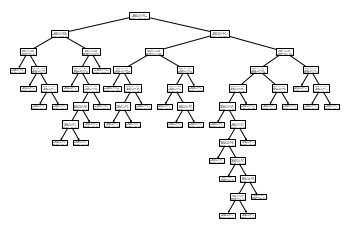

In [3]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate training score by cross-validation.
print(f'Decision Tree:')
print(f'\tTrain score = {cross_val_score(clf, X_train, y_train, cv=3)}')

# Plot the tree.
#	For better plotting try graphviz: https://scikit-learn.org/stable/modules/tree.html
tree.plot_tree(clf)
plt.show()


#### **Evaluation of K-Nearest Neighbor**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Evaluate training score by cross-validation.
print(f'K-Nearest Neighbors:')
print(f'\tTrain score = {cross_val_score(neigh, X_train, y_train, cv=3)}')


K-Nearest Neighbors:
	Train score = [0.92413793 0.88965517 0.90344828]


#### **PCA**

In [5]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

# Percentage of variance explained by each of the selected components.
print(f'Explained variance ratio = {pca.explained_variance_ratio_}')

fig = px.scatter(principalComponents, x=0, y=1, color=df['Class'])
fig.show()


Explained variance ratio = [0.32262492 0.14065724]


#### **Evaluation of the Decision Tree and K-Nearest Neighbor with random samples**

The following function provides a stratified sample according to a percentage of the population:

In [6]:
from sklearn.utils.random import sample_without_replacement


def stratified_sample_without_replacement(df, percentage):
    """
    Get a % samples of a population.

    Parameters
    ----------
    data: nparray
        Original standardized data.
    percentage:
        Percentage of desired random samples.

    Returns
    -------
    n_population * percentage random X_train, y_train and samples.
    """

    n_population = len(df)

    samples = sample_without_replacement(
        n_population=n_population, n_samples=n_population * percentage)

    X_train = df.iloc[samples, :-1].values
    y_train = df.iloc[samples, -1].values

    print(f'{percentage * 100}% of samples without replacement = {samples}\n')
    print(df.iloc[samples, :])

	# Decision Tree.
    clf.fit(X_train, y_train)

    # Evaluate training score by cross-validation.
    print(f'\nDecision Tree [{percentage * 100}%]:')
    print(
        f'\tTrain score = {cross_val_score(clf, X_train, y_train, cv=3)}')

    # Plot the tree.
    tree.plot_tree(clf)
    plt.show()

	# K-Nearest Neighbor.
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)

    # Evaluate training score by cross-validation.
    print(f'K-Nearest Neighbor [{percentage * 100}%]:')
    print(
        f'\tTrain score = {cross_val_score(neigh, X_train, y_train, cv=3)}')


**Decision Tree and K-Nearest Neighbor with stratified random sample \[10%\]**

10.0% of samples without replacement = [338 289 357  53 173  55 122 245  37 242  36 120 345 351 358 312 405 225
 275 186  52 352 303 387 230 332 361 267 378  75  28 408 236 362 288  13
  91 327 164 208 258 115 270]

     handicapped-infants  water-project-cost-sharing  \
338                  2.0                         1.0   
289                  2.0                         2.0   
357                  1.0                         1.0   
53                   2.0                         2.0   
173                  1.0                         1.0   
55                   1.0                         2.0   
122                  1.0                         1.0   
245                  2.0                         1.0   
37                   2.0                         2.0   
242                  1.0                         1.0   
36                   2.0                         0.0   
120                  1.0                         0.0   
345                  1.0                         1.0   


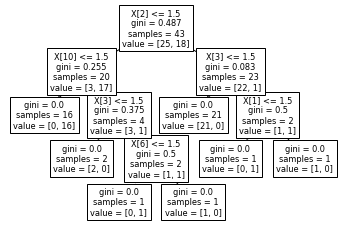

K-Nearest Neighbor [10.0%]:
	Train score = [0.8        0.92857143 0.85714286]


In [7]:
stratified_sample_without_replacement(df, 0.1)

**Decision Tree and K-Nearest Neighbor with stratified random sample \[50%\]**

50.0% of samples without replacement = [281 166 361 319 322 364 431 212 165 137 432  80 427 220 156 422   3 296
 403 195  73 194  37 430   1  45 347 291 343 399  68 196 100 339 377  33
 283 218  25 406 303 104 315 193 287 316 251  31  28 272 394 260  75 390
 297 176 307 225  11 244 378 269 353 418 256 243 386 299  19 334  23  82
 324 202 242 208  54 139  13   6 388  35 213  84 357 285 429  92 416  55
 279 254  90  22   9 294  51 134 188  60 155 146 217 358 152 276  79 323
 253 389 211  27 179 180 107 144  88  39 172 326  40 150 248 205 257 351
 306  81 151 262 421 342 354 115 232  96  59 381 105  50 148 203 130 101
 160   8 302 304 235 259 424 149 252 413 415 154 138  71 368 405 181 400
 423  66 140 367 267 116 167 414 360 157 426 337 434  53 352 359 163 341
 402 410 380  87 171 143 109 234 300 103 200 295 126 159 238 120 185 170
 142 278 396  30 411 419  52 379 290 186 312 207 199 356 145 206 264  63
 191]

     handicapped-infants  water-project-cost-sharing  \
281                  2

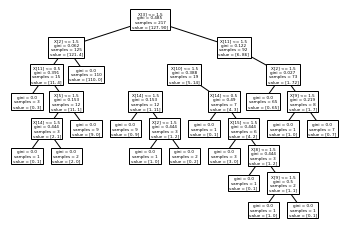

K-Nearest Neighbor [50.0%]:
	Train score = [0.91780822 0.88888889 0.93055556]


In [8]:
stratified_sample_without_replacement(df, 0.5)

#### **Imputation of missing values**

In [9]:
import numpy as np

# Reload '.arff' file.
data = arff.loadarff("../datasets/vote.arff")
df = pd.DataFrame(data[0])

df.replace(to_replace="?", value=np.nan)

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

print(df.iloc[3,4])

b'?'


In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='constant')
imp.fit_transform(X_train)

print('Impute missing values by constant strategy:\n')
X_train

Impute missing values by constant strategy:



array([[b'n', b'y', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'y', b'n', ..., b'y', b'n', b'?'],
       [b'?', b'y', b'y', ..., b'y', b'n', b'n'],
       ...,
       [b'n', b'?', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'n', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'y', b'n', ..., b'y', b'?', b'n']], dtype=object)

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit_transform(X_train)

print('Impute missing values by most_frequent strategy:\n')
X_train

Impute missing values by most_frequent strategy:



array([[b'n', b'y', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'y', b'n', ..., b'y', b'n', b'?'],
       [b'?', b'y', b'y', ..., b'y', b'n', b'n'],
       ...,
       [b'n', b'?', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'n', b'n', ..., b'y', b'n', b'y'],
       [b'n', b'y', b'n', ..., b'y', b'?', b'n']], dtype=object)

In [12]:
enc = preprocessing.OrdinalEncoder()

# Swap unencoded columns values for encoded columns values.
df[features] = enc.fit_transform(df[features])

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

#### **[Features selection](https://scikit-learn.org/stable/modules/feature_selection.html#)**

**[Tree-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)**

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print(f'X_train.shape = {X_train.shape}')

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)

print(f'X_new.shape = {X_new.shape}')

# Decision Tree.
clf.fit(X_new, y_train)

# Evaluate training score by cross-validation.
print('\nDecision Tree:')
print(
    f'\tTrain score = {cross_val_score(clf, X_new, y_train, cv=3)}')

# K-Nearest Neighbor.
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, y_train)

# Evaluate training score by cross-validation.
print('K-Nearest Neighbor:')
print(
    f'\tTrain score = {cross_val_score(neigh, X_new, y_train, cv=3)}')


X_train.shape = (435, 16)
X_new.shape = (435, 6)

Decision Tree:
	Train score = [0.96551724 0.94482759 0.91724138]
K-Nearest Neighbor:
	Train score = [0.96551724 0.93103448 0.95172414]


**[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)**

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(f'X_train.shape = {X_train.shape}')

X_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)

print(f'X_new.shape = {X_new.shape}')

# Decision Tree.
clf.fit(X_new, y_train)

# Evaluate training score by cross-validation.
print('\nDecision Tree:')
print(
    f'\tTrain score = {cross_val_score(clf, X_new, y_train, cv=3)}')

# K-Nearest Neighbor.
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, y_train)

# Evaluate training score by cross-validation.
print('K-Nearest Neighbor:')
print(
    f'\tTrain score = {cross_val_score(neigh, X_new, y_train, cv=3)}')

X_train.shape = (435, 16)
X_new.shape = (435, 2)

Decision Tree:
	Train score = [0.97241379 0.95862069 0.93103448]
K-Nearest Neighbor:
	Train score = [0.95862069 0.94482759 0.92413793]


#### **Discretization**

Due to the small range of values for the previous dataset, a new file has been chosen: [weather.arff](https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/weather.arff).

In [25]:
# Load '.arff' file.
data = arff.loadarff("../datasets/weather.arff")
df = pd.DataFrame(data[0])

# Categorical features to encode:
features = df.columns.tolist()

enc = preprocessing.OrdinalEncoder()

# Swap unencoded columns values for encoded columns values.
df[features] = enc.fit_transform(df[features])

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

df

,outlook,temperature,humidity,windy,play
0,2.0,11.0,4.0,0.0,0.0
1,2.0,8.0,6.0,1.0,0.0
2,0.0,10.0,5.0,0.0,1.0
3,1.0,4.0,9.0,0.0,1.0
4,1.0,2.0,3.0,0.0,1.0
5,1.0,1.0,1.0,1.0,0.0
6,0.0,0.0,0.0,1.0,1.0
7,2.0,6.0,8.0,0.0,0.0
8,2.0,3.0,1.0,0.0,1.0
9,1.0,7.0,3.0,0.0,1.0


In [39]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile').fit(X_train)
# 'n_bins' also allows array-like types, that indicates the number of bins each:
#est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2, ...], encode='ordinal').fit(X_train)

est.transform(X_train)

C:\Users\ventu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.



array([[2., 2., 1., 0.],
       [2., 2., 2., 0.],
       [0., 2., 1., 0.],
       [1., 0., 2., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [2., 1., 2., 0.],
       [2., 0., 0., 0.],
       [1., 2., 1., 0.],
       [2., 2., 0., 0.],
       [0., 1., 2., 0.],
       [0., 2., 0., 0.],
       [1., 1., 2., 0.]])

In [40]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans').fit(X_train)

est.transform(X_train)

C:\Users\ventu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_discretization.py:209: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.

C:\Users\ventu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.



array([[2., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 1., 0.],
       [1., 1., 2., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [2., 1., 2., 0.],
       [2., 0., 0., 0.],
       [1., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 1., 1.],
       [0., 2., 0., 0.],
       [1., 1., 2., 1.]])